# Online Contextual Bandits
** *
This IPython notebook illustrates the usage of the [contextualbandits](https://www.github.com/david-cortes/contextualbandits) package's `online` module through a simulation with public datasets.

** Small note: if the TOC here is not clickable or the math symbols don't show properly, try visualizing this same notebook from nbviewer following [this link](http://nbviewer.jupyter.org/github/david-cortes/contextualbandits/blob/master/example/online_contextual_bandits.ipynb). **

** *
### Sections 

[1. Problem description](#p1)

[2. Algorithms](#p2)

[3. Experiments](#p3)

* [3.1 Reading the data](#p31)

* [3.2 Full-batch models](#p32)

* [3.3 Streaming models](#p33)

[4. References](#p4)

** *
<a id="p1"></a>
## 1. Problem description

Contextual bandits, also known as multi-armed bandits with covariates or associative reinforcement learning, is a problem similar to multi-armed bandits, but with the difference that side information or covariates are available at each iteration and can be used to select an arm, whose rewards are also dependent on the covariates.
 

The problem comes from an iterative process generating data as follows:

* At each round, the world creates an observation consisting of a set of covariates $X$ of fixed dimension and a vector of rewards $r$ (which are stochastic but dependent on the covariates) of length corresponding to $m$, the number of arms.

* An agent must choose an arm or label for the observation among the set of $m$ arms.

* The world reveals the reward for the arm chosen by the agent, but not for the other arms.

The purpose is of course to build a policy that would maximize the rewards obtained by the agent. The arms might also expire over time and new arms might appear too, leading to the same exploration-exploitation dilemma faced in multi-armed bandits.

The problem is very similar to multi-class or multi-label classification (with the reward being whether the right label was chosen or not), but with the big difference that the right label or set of labels is not known for each observation, only whether the label that was chosen by the agent for each observation was correct or not.

Examples of such scenarios include online advertising, where we only know whether a user clicked an ad that he was presented with, but don't know which other ads he would have clicked; or clinic trials where we know how a person responded to a treatment, but don't know how he would have responded to a different treatment.

While, in general, algorithms for the contextual bandits problem assume continuous rewards in the range $r \in [0,1]$, **this package deals only with the case of discrete rewards $r \in \{0,1\}$.**
 

This IPython notebook in particular deals with the problem of building online algorithms that would work with little or no data, and which have to make a trade-off between exploring new or little-known arms or exploiting what's known to be good arms.

For the related problems of policy evaluation (determining how good is an algorithm given that we don't know the right labels for each observation) and off-policy learning (constructing better algorithms from data consisting of actions chosen by a different policy) see the other IPython notebooks [Off-policy Learning in Contextual Bandits](http://nbviewer.jupyter.org/github/david-cortes/contextualbandits/blob/master/example/offpolicy_learning.ipynb) and [Policy Evaluation in Contextual Bandits](http://nbviewer.jupyter.org/github/david-cortes/contextualbandits/blob/master/example/policy_evaluation.ipynb).

** *
<a id="p2"></a>
## 2. Algorithms 

 

The same high-level ideas from multi-armed bandits can be adapted to work with contextual bandits too, taking a binary classifier algorithm as a base or "oracle". These include:

* Upper-confidence bounds (a.k.a. "Optimism in the face of uncertainty"), consisting in taking an upper bound on the reward predicted for an arm. From this family, the package includes the algorithms `BootstrappedUCB`, `LinUCB`, and `BayesianUCB`. Note that the last two are not scalable to high-dimensional data, and thus not shown here.

* Thompson sampling, consisting in choosing an arm with probability proportional to it being the best arm. The implementations in this package include `BootstrappedTS`, `BayesianTS`, and `SoftmaxExplorer`. Note that the Bayesian approach is not scalable to high-dimensional data, and thus not shown here.

* Greedy exploration, consisting in choosing an arm at random sometimes so as to keep exploring. The implementation here is `EpsilonGreedy`. Other approaches such as epoch-greedy, while seemingly good in theory, don't seem to be competitive or perform well in practice, so I preferred to skip them.

* Adaptive exploration, consisting in choosing an arm according to models when we expect a reward with high certainty, and choosing another at random when not. The implementation here is `AdaptiveGreedy`.

* Explore-then-exploit, consisting in choosing arms at random until sufficient data is gathered, and then exploiting based on the information available.

Additionally, the package includes the heuristic `ActiveExplorer` based on "active learning", which tries to choose an observation according to its leverage on the model if its label were known; and `SeparateBandits`, which fits separate models for each arm with no guiding heuristic.

For more information see the documentation of each policy (e.g. you can try `help(contextualbandits.online.BootstrappedUCB`) and the references section at the end. Some of the policies here such as `AdaptiveGreedy` haven't been yet evaluated or described in any research papers for the scenario of contextual bandits though, and there might be better ways to convert the multi-armed bandits strategy to a contextual bandits strategy than how it was done here.

All of these heuristics are enhanced with an optional beta prior for arms for which not enough information to build a classifier is available, which will make predictions as random numbers drawn from a beta distribution with a pre-specified prior. In a cold-start scenario, the priors chosen a make a huge impact on the short- and middle-term performance of policies, even bigger than the heuristic chosen, so be careful to tune it properly.

 

All the policies/heuristics implemented here, except for `LinUCB`, `BayesianUCB` and `BayesianTS`, are meta-heuristics that take a binary classifier algorithm as a base in order to choose arms. Note that, unlike algorithms such as `LinUCB`, while they are meant for an online learning scenario, they still require to be refit with all the data each time rather than progrssively adding batches of data with a `partial_fit` method.

The classifier to pass to them must have a scikit-learn-like API (not necessarily fully scikit-learn-compatible) with `fit` and `decision_function` methods.

Links to the documentation of each:
* [ActiveExplorer](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.ActiveExplorer)
* [AdaptiveGreedy](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.AdaptiveGreedy)
* [BayesianTS](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.BayesianTS)
* [BayesianUCB](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.BayesianUCB)
* [BootstrappedTS](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.BootstrappedTS)
* [BootstrappedUCB](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.BootstrappedUCB)
* [EpsilonGreedy](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.EpsilonGreedy)
* [ExploreFirst](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.ExploreFirst)
* [LinUCB](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.LinUCB)
* [SeparateClassifiers](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.SeparateClassifiers)
* [SoftmaxExplorer](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.online.SoftmaxExplorer)

** *
<a id="p3"></a>
## 3. Experiments 

 

Data for contextual bandits is not easily available, and is hard to work with in terms of evaluation, but it is possible to turn any multi-label classification dataset into contextual bandits by revealing only the class for one label per observation. Doing this also has the advantage that we know also the rewards for all other arms when we want to evaluate a policy, but we can choose not to reveal them to the agent to simulate a real scenario. 
 

The experiments here consist in iterating over a multi-label dataset, letting each policy make choices as it passes through the data and observes rewards for the actions it chooses, and recording the reward that they receive – that is, whether the labels they choose were correct or not. The base classification algorithm used is logistic regression from scikit-learn's linear_model module.


The data used is the [Bibtex dataset](http://mlkd.csd.auth.gr/publication_details.asp?publicationID=278) see (_"Multilabel text classification for automated tag suggestion"_), containing tags that people have assigned to different papers (the goal being to learn to suggest tags based on features from the papers), which is publicly available under the [Extreme Classification Repository](http://manikvarma.org/downloads/XC/XMLRepository.html).


**Note that the module `contextualbandits.evaluation` also contains a function [evaluateFullyLabeled](http://contextual-bandits.readthedocs.io/en/latest/index.html#contextualbandits.evaluation.evaluateFullyLabeled) that automates all the predict-evaluate-refit process done here in one function.**

<a id="p31"></a>
** *
### 3.1 Reading the data

Loading the data - format is a sparse text file as used in libsvm and others, so it cannot be easily read with pandas - the lines read like this:
```
19,89,152,155 44:1.000000 66:1.000000 77:1.000000 100:1.000000 110:1.000000 111:1.000000 121:1.000000 129:1.000000 161:1.000000 173:1.000000 185:1.000000 212:1.000000 216:1.000000 257:1.000000 263:1.000000 265:1.000000 267:1.000000 299:1.000000 326:1.000000 361:1.000000 362:1.000000 363:1.000000 412:1.000000 416:1.000000 427:1.000000 477:1.000000 505:1.000000 512:1.000000 515:1.000000 517:1.000000 520:1.000000 530:1.000000 539:1.000000 576:1.000000 590:1.000000 620:1.000000 674:1.000000 703:1.000000 735:1.000000 754:1.000000 798:1.000000 807:1.000000 812:1.000000 830:1.000000 864:1.000000 870:1.000000 895:1.000000 942:1.000000 947:1.000000 1002:1.000000 1019:1.000000 1022:1.000000 1040:1.000000 1058:1.000000 1062:1.000000 1106:1.000000 1120:1.000000 1124:1.000000 1129:1.000000 1138:1.000000 1145:1.000000 1175:1.000000 1179:1.000000 1181:1.000000 1183:1.000000 1186:1.000000 1196:1.000000 1201:1.000000 1206:1.000000 1209:1.000000 1222:1.000000 1233:1.000000 1241:1.000000 1261:1.000000 1296:1.000000 1310:1.000000 1311:1.000000 1318:1.000000 1416:1.000000 1417:1.000000 1421:1.000000 1475:1.000000 1478:1.000000 1506:1.000000 1510:1.000000 1538:1.000000 1560:1.000000 1591:1.000000 1596:1.000000 1625:1.000000 1637:1.000000 1664:1.000000 1666:1.000000 1667:1.000000 1668:1.000000 1669:1.000000 1671:1.000000 1677:1.000000 1680:1.000000 1681:1.000000 1688:1.000000 1693:1.000000 1720:1.000000 1724:1.000000 1743:1.000000 1767:1.000000 1785:1.000000 1793:1.000000 1802:1.000000 1812:1.000000 1814:1.000000

```

(first are the labels for the observation, then the values of the non-zero columns)

In [1]:
import pandas as pd, numpy as np, re
from sklearn.preprocessing import MultiLabelBinarizer

def parse_data(file_name):
    features = list()
    labels = list()
    with open(file_name, 'rt') as f:
        f.readline()
        for l in f:
            if bool(re.search("^[0-9]", l)):
                g = re.search("^(([0-9]{1,2},?)+)\s(.*)$", l)
                labels.append([int(i) for i in g.group(1).split(",")])
                features.append(eval("{" + re.sub("\s", ",", g.group(3)) + "}"))
            else:
                l = l.strip()
                labels.append([])
                features.append(eval("{" + re.sub("\s", ",", l) + "}"))
    features = pd.DataFrame.from_dict(features).fillna(0).as_matrix()
    mlb = MultiLabelBinarizer()
    y = mlb.fit_transform(labels)
    return features, y

X, y = parse_data("Bibtex_data.txt")

/home/david_cortes_rivera/anaconda3/envs/py3d/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


<a id="p32"></a>
** *
## 3.2 Full-batch models

Turning logistic regression into contextual bandits policies:

In [2]:
from sklearn.linear_model import LogisticRegression
from contextualbandits.online import BootstrappedUCB, BootstrappedTS, SeparateClassifiers,\
            EpsilonGreedy, AdaptiveGreedy, ExploreFirst, ActiveExplorer, SoftmaxExplorer
from copy import deepcopy

nchoices = y.shape[1]
base_algorithm = LogisticRegression(random_state=123, solver='lbfgs')
beta_prior = ((3, 7), 2) # until there are at least 2 observations of each class, will use prior Beta(3, 7)

## The base algorithm is embedded in different metaheuristics
bootstrapped_ucb = BootstrappedUCB(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior)
bootstrapped_ts = BootstrappedTS(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior)
one_vs_rest = SeparateClassifiers(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior)
epsilon_greedy = EpsilonGreedy(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior)
epsilon_greedy_nodecay = EpsilonGreedy(deepcopy(base_algorithm), nchoices = nchoices,
                                     beta_prior=beta_prior, decay=None)
adaptive_greedy_thr = AdaptiveGreedy(deepcopy(base_algorithm), nchoices=nchoices,
                                     decay_type='threshold')
adaptive_greedy_perc = AdaptiveGreedy(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior,
                                      decay_type='percentile', decay=0.9997)
explore_first = ExploreFirst(deepcopy(base_algorithm), nchoices = nchoices,
                             beta_prior=None, explore_rounds=1500)
active_explorer = ActiveExplorer(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior)
adaptive_active_greedy = AdaptiveGreedy(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior,
                                        active_choice='weighted', decay_type='percentile', decay=0.9997)
softmax_explorer = SoftmaxExplorer(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior)

models = [bootstrapped_ucb, bootstrapped_ts, one_vs_rest, epsilon_greedy, epsilon_greedy_nodecay,
          adaptive_greedy_thr, adaptive_greedy_perc, explore_first, active_explorer,
          adaptive_active_greedy, softmax_explorer]

_(Bayesian methods and LinUCB don't scale well enough for the dimensionality of the data, so they are not illustrated here)_

Now running the experiment:

In [3]:
# These lists will keep track of the rewards obtained by each policy
rewards_ucb, rewards_ts, rewards_ovr, rewards_egr, rewards_egr2, \
rewards_agr, rewards_agr2, rewards_efr, rewards_ac, \
rewards_aac, rewards_sft = [list() for i in range(len(models))]

lst_rewards = [rewards_ucb, rewards_ts, rewards_ovr, rewards_egr, rewards_egr2,
               rewards_agr, rewards_agr2, rewards_efr, rewards_ac,
               rewards_aac, rewards_sft]

# batch size - algorithms will be refit after N rounds
batch_size=50

# initial seed - all policies start with the same small random selection of actions/rewards
first_batch = X[:batch_size, :]
action_chosen = np.random.randint(nchoices, size=batch_size)
rewards_received = y[np.arange(batch_size), action_chosen]

# fitting models for the first time
for model in models:
    np.random.seed(123)
    model.fit(X=first_batch, a=action_chosen, r=rewards_received)
    
# these lists will keep track of which actions does each policy choose
lst_a_ucb, lst_a_ts, lst_a_ovr, lst_a_egr, lst_a_egr2, lst_a_agr, \
lst_a_agr2, lst_a_efr, lst_a_ac, lst_a_aac, \
lst_a_sft = [action_chosen.copy() for i in range(len(models))]

lst_actions = [lst_a_ucb, lst_a_ts, lst_a_ovr, lst_a_egr, lst_a_egr2, lst_a_agr,
               lst_a_agr2, lst_a_efr, lst_a_ac, lst_a_aac, lst_a_sft]

# rounds are simulated from the full dataset
def simulate_rounds(model, rewards, actions_hist, X_global, y_global, batch_st, batch_end):
    np.random.seed(batch_st)
    
    ## choosing actions for this batch
    actions_this_batch = model.predict(X_global[batch_st:batch_end, :]).astype('uint8')
    
    # keeping track of the sum of rewards received
    rewards.append(y_global[np.arange(batch_st, batch_end), actions_this_batch].sum())
    
    # adding this batch to the history of selected actions
    new_actions_hist = np.append(actions_hist, actions_this_batch)
    
    # now refitting the algorithms after observing these new rewards
    np.random.seed(batch_st)
    model.fit(X_global[:batch_end, :], new_actions_hist, y_global[np.arange(batch_end), new_actions_hist])
    
    return new_actions_hist

# now running all the simulation
for i in range(int(np.floor(X.shape[0] / batch_size))):
    batch_st = (i + 1) * batch_size
    batch_end = (i + 2) * batch_size
    batch_end = np.min([batch_end, X.shape[0]])
    
    for model in range(len(models)):
        lst_actions[model] = simulate_rounds(models[model],
                                             lst_rewards[model],
                                             lst_actions[model],
                                             X, y,
                                             batch_st, batch_end)

Visualizing results:

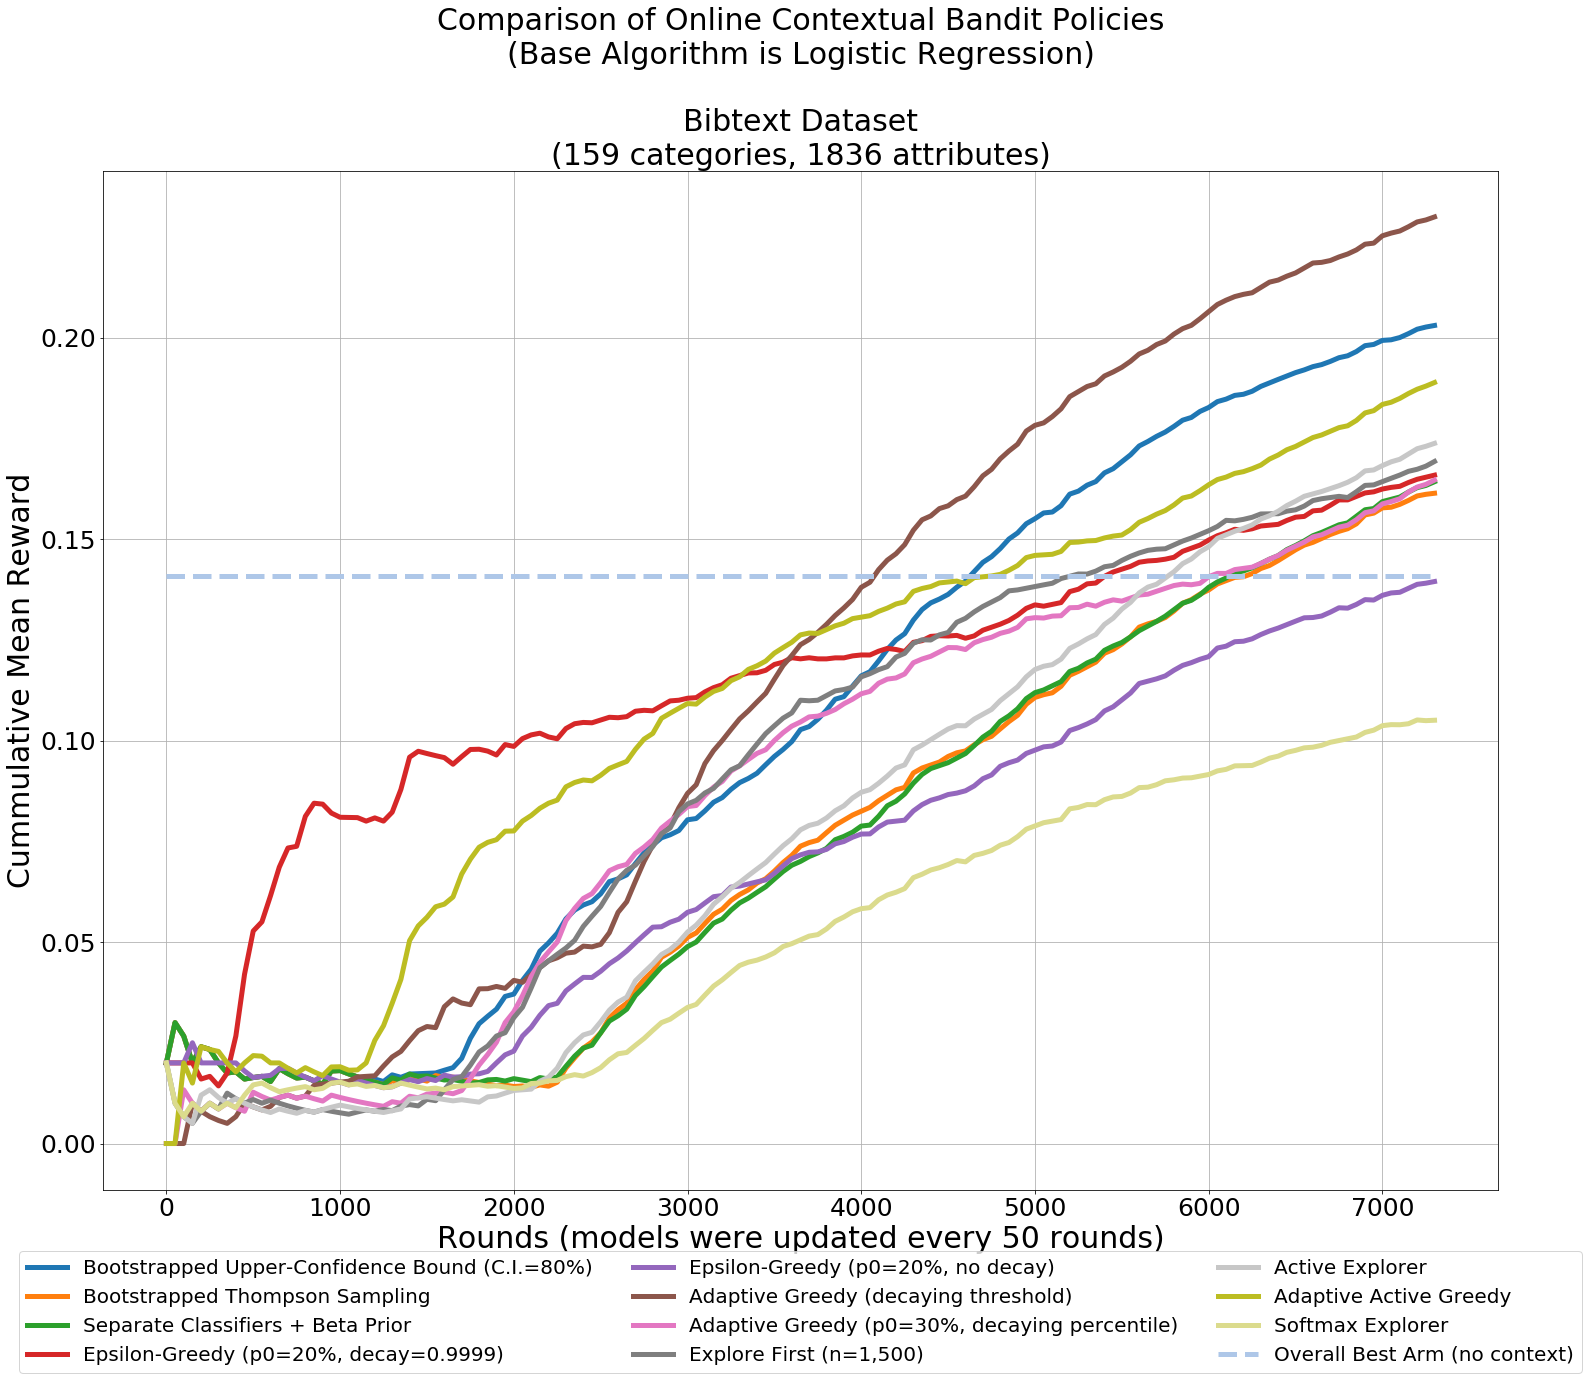

In [4]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

def get_mean_reward(reward_lst, batch_size=batch_size):
    mean_rew=list()
    for r in range(len(reward_lst)):
        mean_rew.append(sum(reward_lst[:r+1])/((r+1)*batch_size))
    return mean_rew

rcParams['figure.figsize'] = 25, 15
lwd = 5
cmap = plt.get_cmap('tab20')
colors=plt.cm.tab20(np.linspace(0, 1, 20))

ax = plt.subplot(111)
plt.plot(get_mean_reward(rewards_ucb), label="Bootstrapped Upper-Confidence Bound (C.I.=80%)",linewidth=lwd,color=colors[0])
plt.plot(get_mean_reward(rewards_ts), label="Bootstrapped Thompson Sampling",linewidth=lwd,color=colors[2])
plt.plot(get_mean_reward(rewards_ovr), label="Separate Classifiers + Beta Prior",linewidth=lwd,color=colors[4])
plt.plot(get_mean_reward(rewards_egr), label="Epsilon-Greedy (p0=20%, decay=0.9999)",linewidth=lwd,color=colors[6])
plt.plot(get_mean_reward(rewards_egr2), label="Epsilon-Greedy (p0=20%, no decay)",linewidth=lwd,color=colors[8])
plt.plot(get_mean_reward(rewards_agr), label="Adaptive Greedy (decaying threshold)",linewidth=lwd,color=colors[10])
plt.plot(get_mean_reward(rewards_agr2), label="Adaptive Greedy (p0=30%, decaying percentile)",linewidth=lwd,color=colors[12])
plt.plot(get_mean_reward(rewards_efr), label="Explore First (n=1,500)",linewidth=lwd,color=colors[14])
plt.plot(get_mean_reward(rewards_ac), label="Active Explorer", linewidth=lwd,color=colors[15])
plt.plot(get_mean_reward(rewards_aac), label="Adaptive Active Greedy", linewidth=lwd,color=colors[16])
plt.plot(get_mean_reward(rewards_sft), label="Softmax Explorer", linewidth=lwd,color=colors[17])
plt.plot(np.repeat(y.mean(axis=0).max(),len(rewards_sft)), label="Overall Best Arm (no context)",linewidth=lwd,color=colors[1],ls='dashed')


# import warnings
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 1.25])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=3, prop={'size':20})


plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([i*20 for i in range(8)], [i*1000 for i in range(8)])


plt.xlabel('Rounds (models were updated every 50 rounds)', size=30)
plt.ylabel('Cummulative Mean Reward', size=30)
plt.title('Comparison of Online Contextual Bandit Policies\n(Base Algorithm is Logistic Regression)\n\nBibtext Dataset\n(159 categories, 1836 attributes)',size=30)
plt.grid()
plt.show()

<a id="p33"></a>
** *
### 3.3 Streaming models

Same data and metaheuristics as before, but this time fitting the data in small batches, without letting the algorithms have access to all their historical data - this time the algorithm is scikit-learn's `SGDClassifier`, as these metaheuristics assume a `partial_fit` method:

In [5]:
from sklearn.linear_model import SGDClassifier

nchoices = y.shape[1]
base_algorithm = SGDClassifier(random_state=123, loss='log')
beta_prior = ((3, 7), 2) # until there are at least 2 observations of each class, will use prior Beta(3, 7)

## The base algorithm is embedded in different metaheuristics
bootstrapped_ucb = BootstrappedUCB(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior, batch_train=True)
bootstrapped_ts = BootstrappedTS(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior, batch_train=True)
one_vs_rest = SeparateClassifiers(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior, batch_train=True)
epsilon_greedy = EpsilonGreedy(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior, batch_train=True)
epsilon_greedy_nodecay = EpsilonGreedy(deepcopy(base_algorithm), nchoices = nchoices,
                                     beta_prior=beta_prior, decay=None, batch_train=True)
adaptive_greedy_thr = AdaptiveGreedy(deepcopy(base_algorithm), nchoices=nchoices,
                                     decay_type='threshold', batch_train=True)
adaptive_greedy_perc = AdaptiveGreedy(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior,
                                      decay_type='percentile', decay=0.9997, batch_train=True)
explore_first = ExploreFirst(deepcopy(base_algorithm), nchoices = nchoices,
                             beta_prior=None, explore_rounds=1500, batch_train=True)
active_explorer = ActiveExplorer(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior, batch_train=True)
adaptive_active_greedy = AdaptiveGreedy(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior,
                                        active_choice='weighted', decay_type='percentile', decay=0.9997, batch_train=True)
softmax_explorer = SoftmaxExplorer(deepcopy(base_algorithm), nchoices = nchoices, beta_prior=beta_prior, batch_train=True)

models = [bootstrapped_ucb, bootstrapped_ts, one_vs_rest, epsilon_greedy, epsilon_greedy_nodecay,
          adaptive_greedy_thr, adaptive_greedy_perc, explore_first, active_explorer,
          adaptive_active_greedy, softmax_explorer]

Now running the experiment:

In [6]:
# These lists will keep track of the rewards obtained by each policy
rewards_ucb, rewards_ts, rewards_ovr, rewards_egr, rewards_egr2, \
rewards_agr, rewards_agr2, rewards_efr, rewards_ac, \
rewards_aac, rewards_sft = [list() for i in range(len(models))]

lst_rewards = [rewards_ucb, rewards_ts, rewards_ovr, rewards_egr, rewards_egr2,
               rewards_agr, rewards_agr2, rewards_efr, rewards_ac,
               rewards_aac, rewards_sft]

# batch size - algorithms will be refit after N rounds
batch_size=50

# initial seed - all policies start with the same small random selection of actions/rewards
first_batch = X[:batch_size, :]
action_chosen = np.random.randint(nchoices, size=batch_size)
rewards_received = y[np.arange(batch_size), action_chosen]

# fitting models for the first time
for model in models:
    np.random.seed(123)
    model.fit(X=first_batch, a=action_chosen, r=rewards_received)
    
# these lists will keep track of which actions does each policy choose
lst_a_ucb, lst_a_ts, lst_a_ovr, lst_a_egr, lst_a_egr2, lst_a_agr, \
lst_a_agr2, lst_a_efr, lst_a_ac, lst_a_aac, \
lst_a_sft = [action_chosen.copy() for i in range(len(models))]

lst_actions = [lst_a_ucb, lst_a_ts, lst_a_ovr, lst_a_egr, lst_a_egr2, lst_a_agr,
               lst_a_agr2, lst_a_efr, lst_a_ac, lst_a_aac,lst_a_sft]

# rounds are simulated from the full dataset
def simulate_rounds_stoch(model, rewards, actions_hist, X_batch, y_batch, rnd_seed):
    np.random.seed(rnd_seed)
    
    ## choosing actions for this batch
    actions_this_batch = model.predict(X_batch).astype('uint8')
    
    # keeping track of the sum of rewards received
    rewards.append(y_batch[np.arange(y_batch.shape[0]), actions_this_batch].sum())
    
    # adding this batch to the history of selected actions
    new_actions_hist = np.append(actions_hist, actions_this_batch)
    
    # rewards obtained now
    rewards_batch = y_batch[np.arange(y_batch.shape[0]), actions_this_batch]
    
    # now refitting the algorithms after observing these new rewards
    np.random.seed(rnd_seed)
    model.partial_fit(X_batch, actions_this_batch, rewards_batch)
    
    return new_actions_hist

# now running all the simulation
for i in range(int(np.floor(X.shape[0] / batch_size))):
    batch_st = (i + 1) * batch_size
    batch_end = (i + 2) * batch_size
    batch_end = np.min([batch_end, X.shape[0]])
    
    X_batch = X[batch_st:batch_end, :]
    y_batch = y[batch_st:batch_end, :]
    
    for model in range(len(models)):
        lst_actions[model] = simulate_rounds_stoch(models[model],
                                                   lst_rewards[model],
                                                   lst_actions[model],
                                                   X_batch, y_batch,
                                                   rnd_seed = batch_st)

/home/david_cortes_rivera/anaconda3/envs/py3d/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Visualizing results:

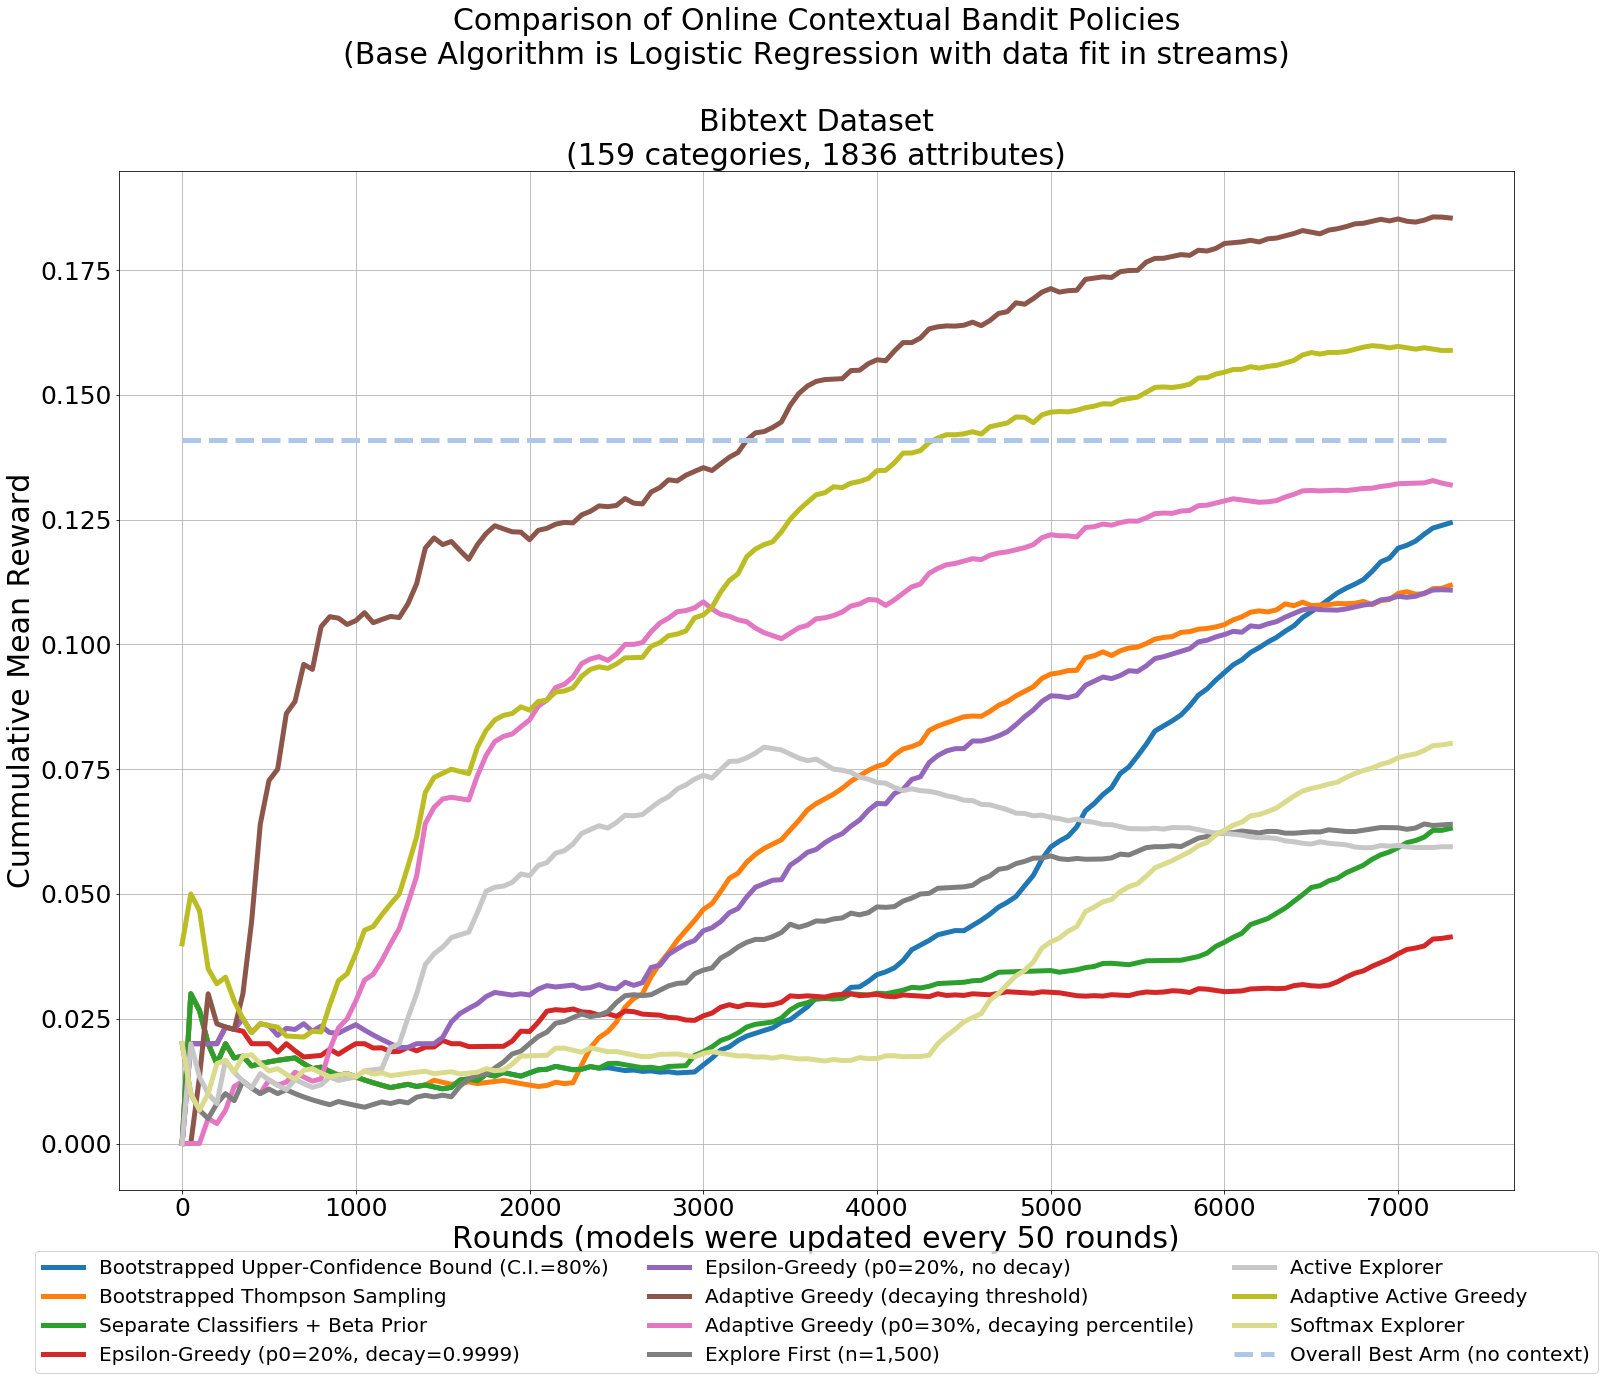

In [7]:
rcParams['figure.figsize'] = 25, 15

ax = plt.subplot(111)
plt.plot(get_mean_reward(rewards_ucb), label="Bootstrapped Upper-Confidence Bound (C.I.=80%)",linewidth=lwd,color=colors[0])
plt.plot(get_mean_reward(rewards_ts), label="Bootstrapped Thompson Sampling",linewidth=lwd,color=colors[2])
plt.plot(get_mean_reward(rewards_ovr), label="Separate Classifiers + Beta Prior",linewidth=lwd,color=colors[4])
plt.plot(get_mean_reward(rewards_egr), label="Epsilon-Greedy (p0=20%, decay=0.9999)",linewidth=lwd,color=colors[6])
plt.plot(get_mean_reward(rewards_egr2), label="Epsilon-Greedy (p0=20%, no decay)",linewidth=lwd,color=colors[8])
plt.plot(get_mean_reward(rewards_agr), label="Adaptive Greedy (decaying threshold)",linewidth=lwd,color=colors[10])
plt.plot(get_mean_reward(rewards_agr2), label="Adaptive Greedy (p0=30%, decaying percentile)",linewidth=lwd,color=colors[12])
plt.plot(get_mean_reward(rewards_efr), label="Explore First (n=1,500)",linewidth=lwd,color=colors[14])
plt.plot(get_mean_reward(rewards_ac), label="Active Explorer", linewidth=lwd,color=colors[15])
plt.plot(get_mean_reward(rewards_aac), label="Adaptive Active Greedy", linewidth=lwd,color=colors[16])
plt.plot(get_mean_reward(rewards_sft), label="Softmax Explorer", linewidth=lwd,color=colors[17])
plt.plot(np.repeat(y.mean(axis=0).max(),len(rewards_sft)), label="Overall Best Arm (no context)",linewidth=lwd,color=colors[1],ls='dashed')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 1.25])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=3, prop={'size':20})


plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([i*20 for i in range(8)], [i*1000 for i in range(8)])


plt.xlabel('Rounds (models were updated every 50 rounds)', size=30)
plt.ylabel('Cummulative Mean Reward', size=30)
plt.title('Comparison of Online Contextual Bandit Policies\n(Base Algorithm is Logistic Regression with data fit in streams)\n\nBibtext Dataset\n(159 categories, 1836 attributes)',size=30)
plt.grid()
plt.show()

<a id="p4"></a>
## 4. References
* Katakis, I., Tsoumakas, G., & Vlahavas, I. (2008, September). Multilabel text classification for automated tag suggestion. In Proceedings of the ECML/PKDD (Vol. 18).

* Snoek, C. G., Worring, M., Van Gemert, J. C., Geusebroek, J. M., & Smeulders, A. W. (2006, October). The challenge problem for automated detection of 101 semantic concepts in multimedia. In Proceedings of the 14th ACM international conference on Multimedia (pp. 421-430). ACM.

* Chapelle, O., & Li, L. (2011). An empirical evaluation of thompson sampling. In Advances in neural information processing systems (pp. 2249-2257).

* Agrawal, S., & Goyal, N. (2013, February). Thompson sampling for contextual bandits with linear payoffs. In International Conference on Machine Learning (pp. 127-135).

* Li, L., Chu, W., Langford, J., & Schapire, R. E. (2010, April). A contextual-bandit approach to personalized news article recommendation. In Proceedings of the 19th international conference on World wide web (pp. 661-670). ACM.

* Chakrabarti, D., Kumar, R., Radlinski, F., & Upfal, E. (2009). Mortal multi-armed bandits. In Advances in neural information processing systems (pp. 273-280).

* Vermorel, J., & Mohri, M. (2005, October). Multi-armed bandit algorithms and empirical evaluation. In European conference on machine learning (pp. 437-448). Springer, Berlin, Heidelberg.